In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("titanic_dataset.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df_survived = df[df["Survived"] == 1]

In [13]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
df_survived.shape

(342, 12)

In [11]:
df.groupby(by='Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


# Missing values analysis

In [17]:
null_counts = map(lambda x: (x,df[x].isnull().values.sum()),df.columns)
print(list(null_counts))

[('PassengerId', 0), ('Survived', 0), ('Pclass', 0), ('Name', 0), ('Sex', 0), ('Age', 177), ('SibSp', 0), ('Parch', 0), ('Ticket', 0), ('Fare', 0), ('Cabin', 687), ('Embarked', 2)]


# Mean is better than sum, because it gives you a sense of proportion

In [16]:
round(100*df.isnull().mean(),2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [18]:
## Cabin column has more than 40% of missing values so we drop it
df = df.drop("Cabin", axis=1)

In [19]:
round(100*df.isnull().mean(),2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.22
dtype: float64

## Median is less affected by outliers as compared to mean

In [21]:
med=df["Age"].median()
df["Age"] = df["Age"].fillna(med) #Imputation

In [22]:
round(100*df.isnull().mean(),2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Embarked       0.22
dtype: float64

## Many imputer algorithms are available to fill missing data ... like knn, mice etc

In [23]:
df=df[df["Embarked"].notna()]

In [24]:
round(100*df.isnull().mean(),2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

# Problem Statement : Variables and factors affecting survival of passengers

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [26]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [29]:
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [30]:
extra_cols=["PassengerId", "Name","Ticket"]
num_cols=["Age","Fare"]
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]

In [31]:
df = df.drop(extra_cols, axis=1)

In [32]:
df.shape

(889, 8)

In [33]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Univariate Analysis

## Numerical

Hist plot of  Age


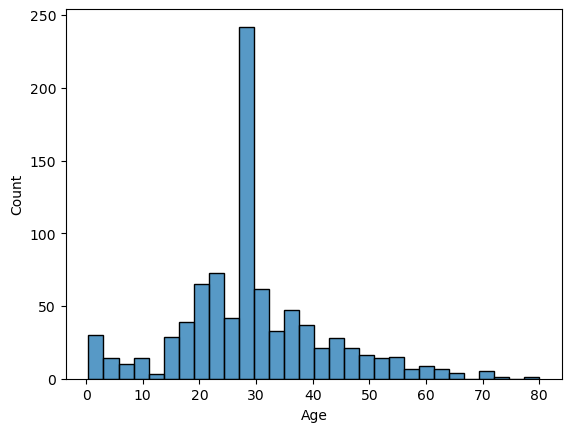

Hist plot of  Fare


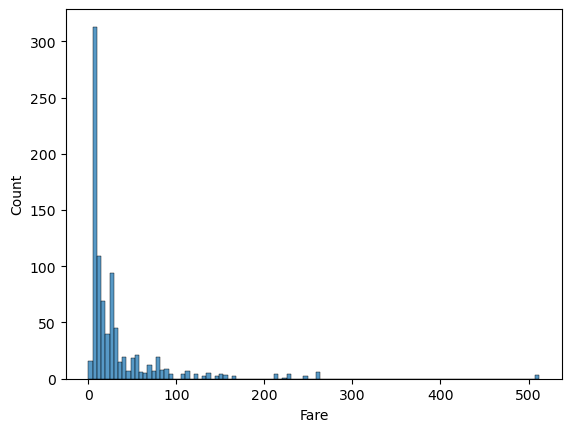

In [34]:
for i in num_cols:
    print("Hist plot of ", i)
    sns.histplot(x=df[i])
    plt.show()

Box plot of  Age


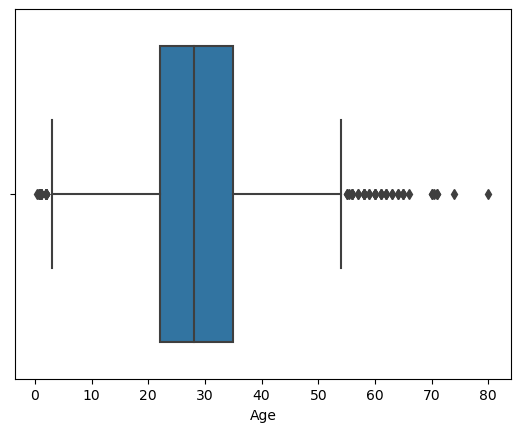

Box plot of  Fare


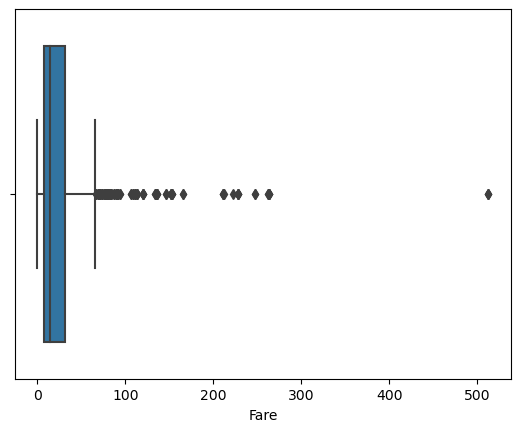

In [35]:
for i in num_cols:
    print("Box plot of ", i)
    sns.boxplot(x=df[i])
    plt.show()

## Categorical

Count plot of  Survived


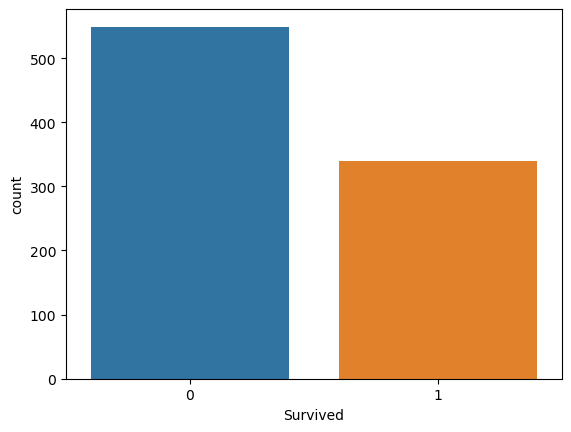

Count plot of  Pclass


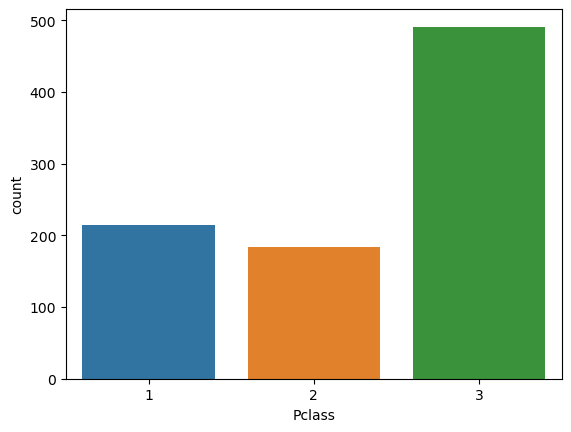

Count plot of  Sex


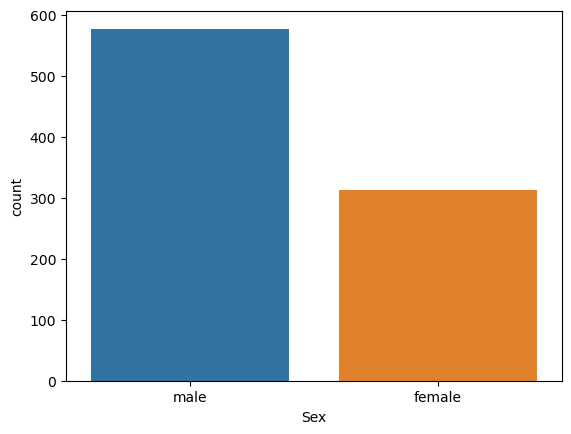

Count plot of  SibSp


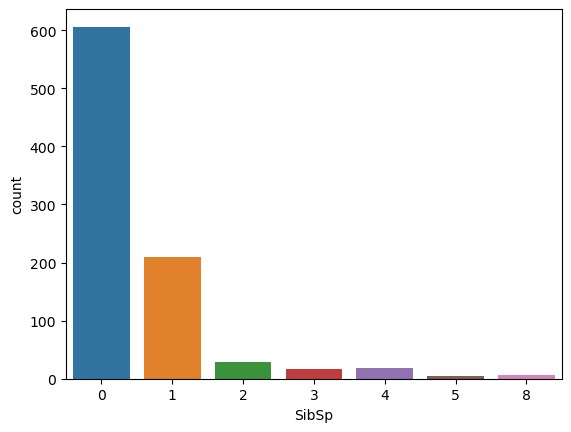

Count plot of  Parch


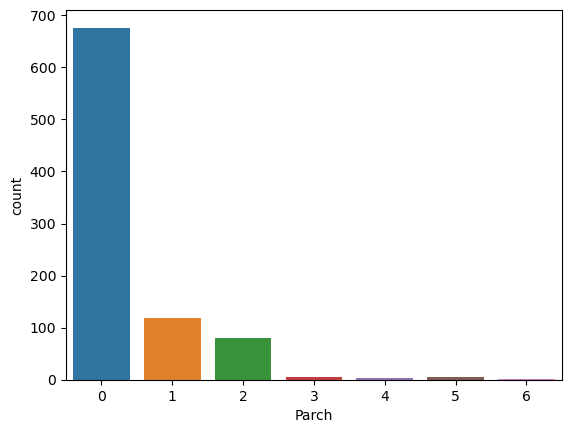

Count plot of  Embarked


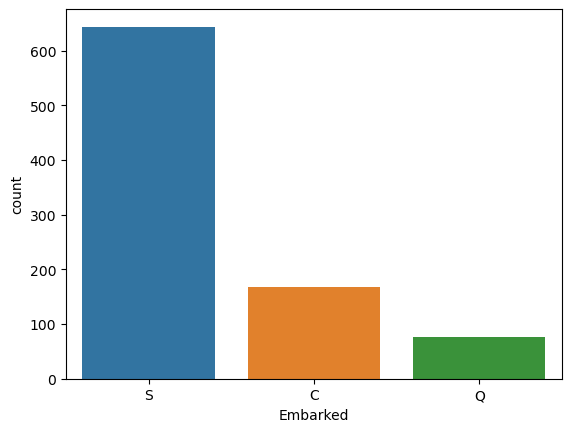

In [36]:
for i in cat_cols:
    print("Count plot of ", i)
    sns.countplot(x=df[i])
    plt.show()

Pie chart of  Survived
Pie chart of  Pclass
Pie chart of  Sex


TypeError: '<' not supported between instances of 'str' and 'int'

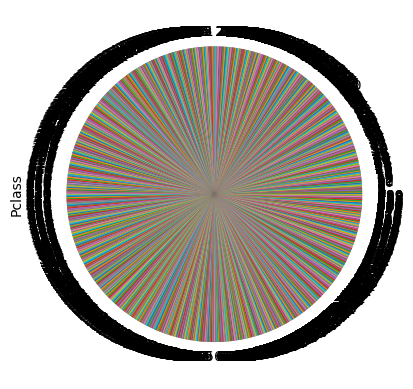

In [47]:
for i in cat_cols:
    print("Pie chart of ", i)
    df[i].plot(kind="pie")

# Bivariate analysis

## Numerical vs Numerical

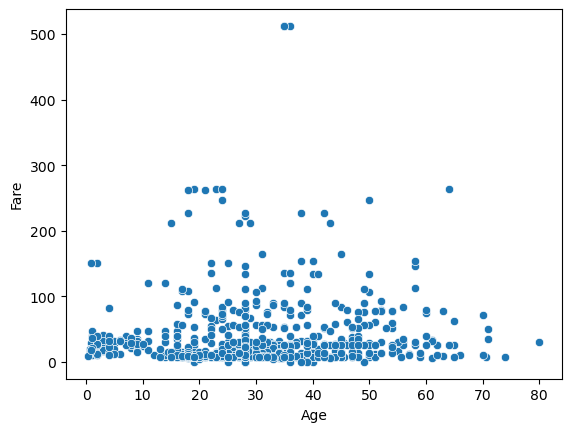

In [41]:
sns.scatterplot(x=df["Age"],y=df["Fare"])
plt.show()

## Numerical vs Categorical

Boxplot of  Survived  Vs  Age


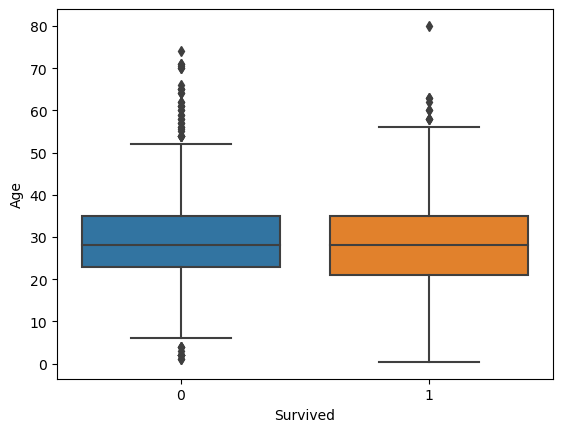

Boxplot of  Survived  Vs  Fare


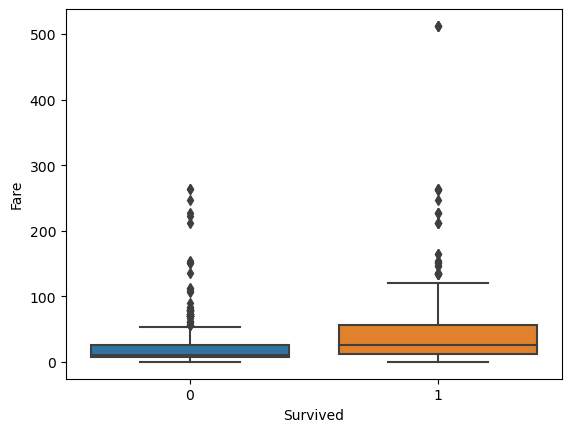

Boxplot of  Pclass  Vs  Age


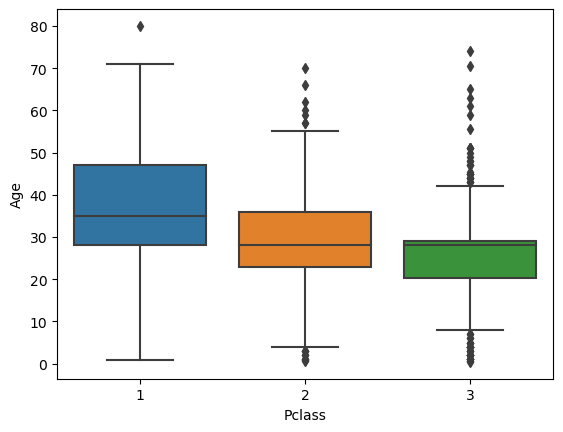

Boxplot of  Pclass  Vs  Fare


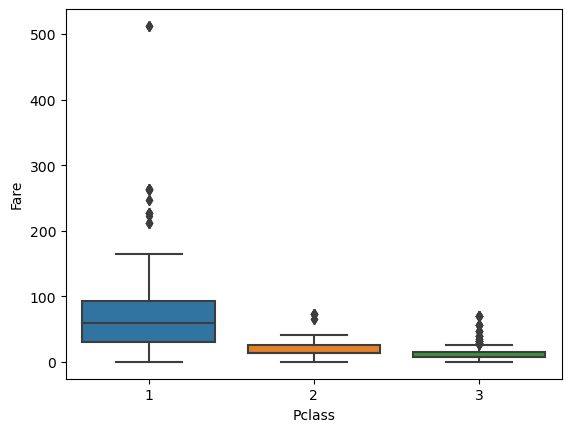

Boxplot of  Sex  Vs  Age


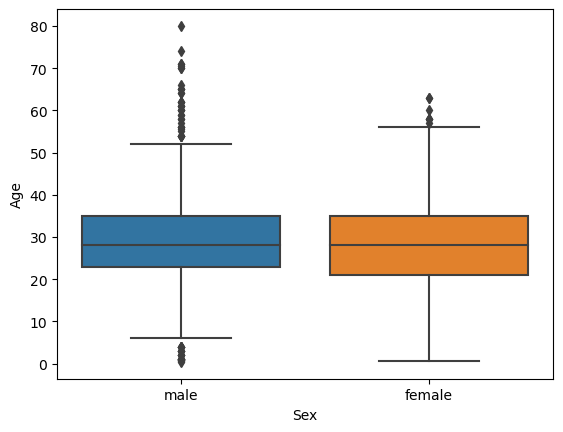

Boxplot of  Sex  Vs  Fare


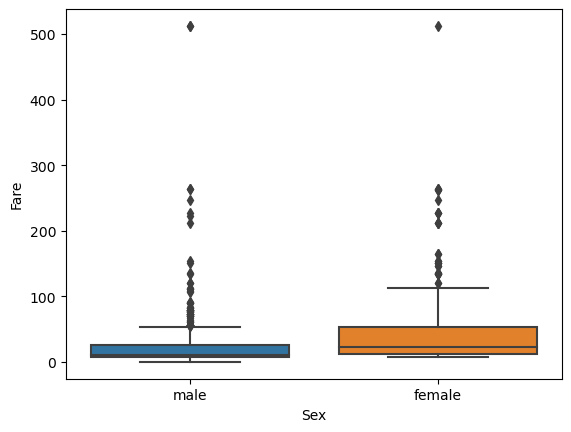

Boxplot of  SibSp  Vs  Age


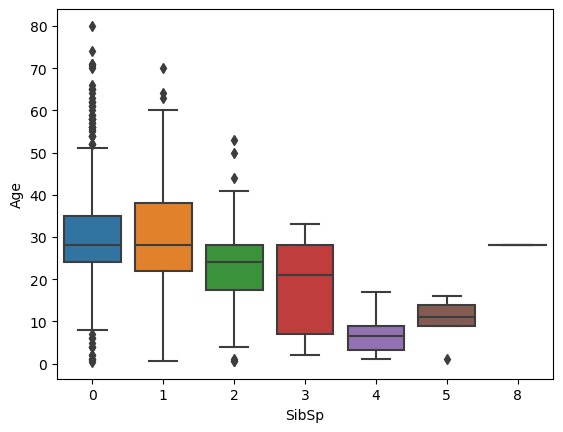

Boxplot of  SibSp  Vs  Fare


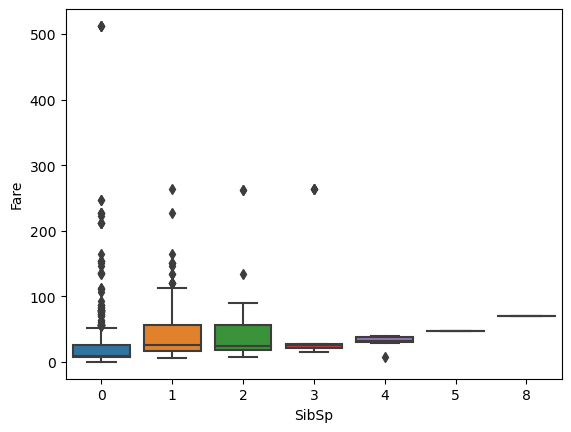

Boxplot of  Parch  Vs  Age


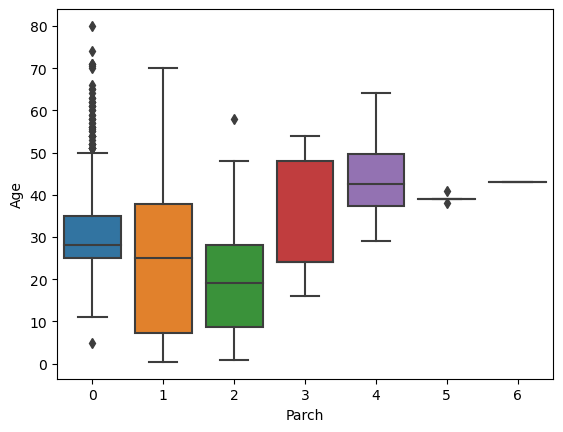

Boxplot of  Parch  Vs  Fare


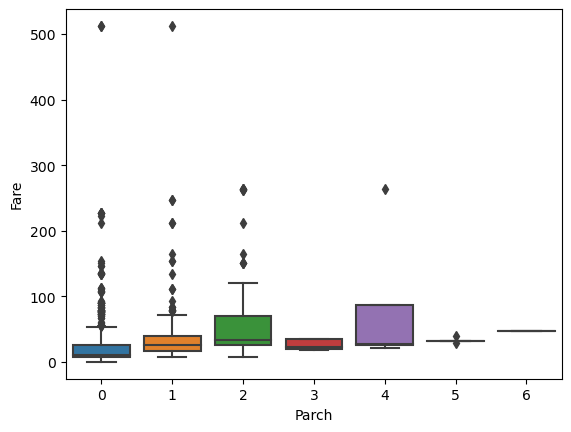

Boxplot of  Embarked  Vs  Age


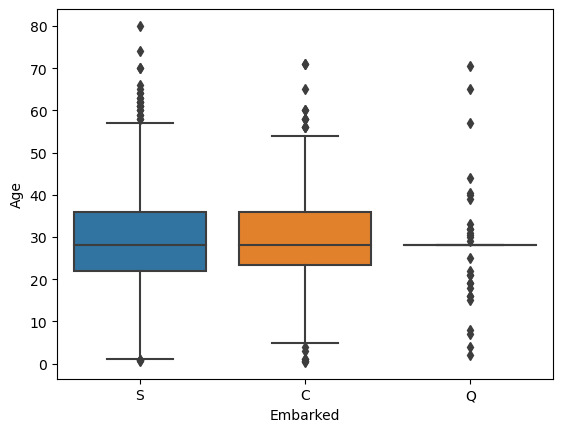

Boxplot of  Embarked  Vs  Fare


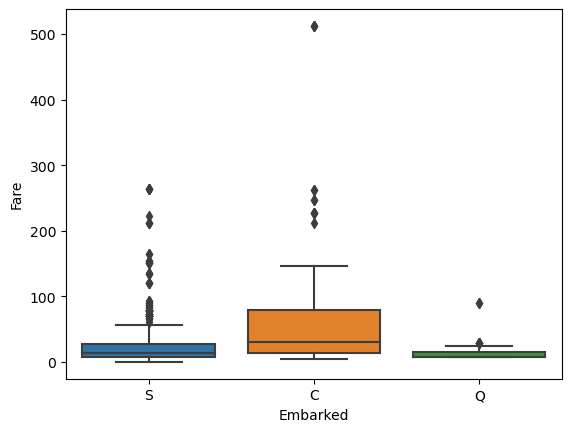

In [42]:
for col1 in cat_cols:
    for col2 in num_cols:
        print("Boxplot of ", col1, " Vs ", col2)
        sns.boxplot(x=df[col1],y=df[col2])
        plt.show()

## Categorical vs Categorical

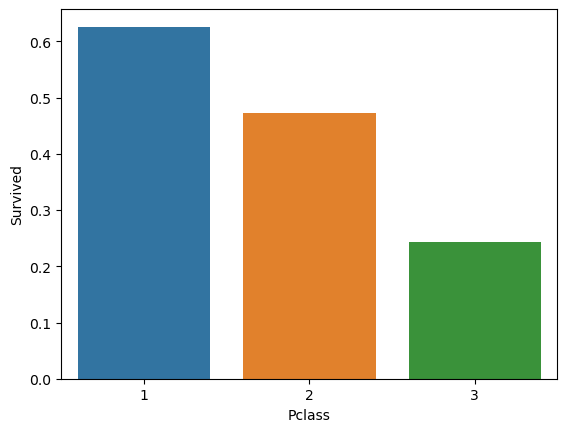

In [43]:
sns.barplot(x=df["Pclass"],y=df["Survived"],ci=None)
plt.show()

# Multivariate analysis

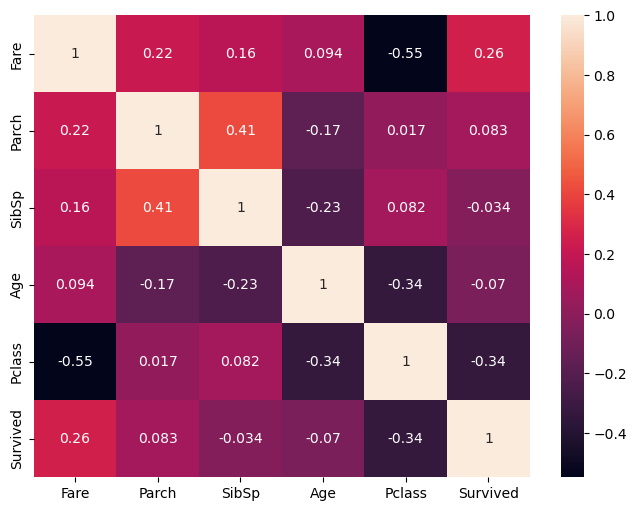

In [45]:
plt.figure(figsize=(8,6)) 
sns.heatmap(df[["Fare","Parch","SibSp","Age","Pclass","Survived"]].corr(),annot=True) 
plt.show()